<a href="https://colab.research.google.com/github/prajwalDU/RainFall_Prediction/blob/main/Log9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rainfall Prediction is the application area of data science and machine learning to predict the state of the atmosphere. It is important to predict the rainfall intensity for effective use of water resources and crop production to reduce mortality due to flood and any disease caused by rain.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading dataset
path = '/content/drive/MyDrive/almabetter/Log9/Meteo.csv'

df = pd.read_csv(path)

In [3]:
# Checking dataset head
df.head()

,time,relativehumidity_2m (%),dewpoint_2m (°C),pressure_msl (hPa),surface_pressure (hPa),cloudcover (%),windspeed_100m (km/h),vapor_pressure_deficit (kPa),precipitation (mm),rain (mm)
0,2020-02-16T00:00,46.0,7.7,1015.5,921.3,28.0,26.9,1.23,0.0,0.0
1,2020-02-16T01:00,50.0,8.3,1015.2,920.5,27.0,26.4,1.09,0.0,0.0
2,2020-02-16T02:00,54.0,8.7,1014.7,919.9,26.0,26.1,0.98,0.0,0.0
3,2020-02-16T03:00,55.0,8.6,1014.7,919.5,26.0,25.9,0.93,0.0,0.0
4,2020-02-16T04:00,55.0,8.1,1014.4,919.2,27.0,24.9,0.90,0.0,0.0


In [4]:
# Checking variables
df.columns

Index(['time', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
       'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloudcover (%)',
       'windspeed_100m (km/h)', 'vapor_pressure_deficit (kPa)',
       'precipitation (mm)', 'rain (mm)'],
      dtype='object')

In [5]:
# Checking info to understand data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26328 entries, 0 to 26327
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time                          26328 non-null  object 
 1   relativehumidity_2m (%)       26213 non-null  float64
 2   dewpoint_2m (°C)              26213 non-null  float64
 3   pressure_msl (hPa)            26213 non-null  float64
 4   surface_pressure (hPa)        26213 non-null  float64
 5   cloudcover (%)                26213 non-null  float64
 6   windspeed_100m (km/h)         26213 non-null  float64
 7   vapor_pressure_deficit (kPa)  26213 non-null  float64
 8   precipitation (mm)            26213 non-null  float64
 9   rain (mm)                     26213 non-null  float64
dtypes: float64(9), object(1)
memory usage: 2.0+ MB


In [6]:
# Checking description 
df.describe()

,relativehumidity_2m (%),dewpoint_2m (°C),pressure_msl (hPa),surface_pressure (hPa),cloudcover (%),windspeed_100m (km/h),vapor_pressure_deficit (kPa),precipitation (mm),rain (mm)
count,26213.000000,26213.00000,26213.000000,26213.000000,26213.000000,26213.000000,26213.000000,26213.000000,26213.000000
mean,72.117499,16.38051,1011.257319,917.974455,51.839545,17.815290,0.911057,0.133003,0.133003
std,21.685022,3.99972,3.102917,2.538704,35.925161,7.465613,0.913528,0.498394,0.498394
min,13.000000,-2.60000,1001.500000,909.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,14.50000,1009.000000,916.200000,20.000000,12.600000,0.210000,0.000000,0.000000
50%,77.000000,18.00000,1011.100000,918.000000,49.000000,17.700000,0.600000,0.000000,0.000000
75%,91.000000,19.20000,1013.500000,919.800000,89.000000,22.500000,1.300000,0.000000,0.000000
max,100.000000,22.30000,1021.600000,927.000000,100.000000,53.100000,4.840000,11.900000,11.900000


In [ ]:
# Checking null values in all variabels
df.isnull().sum()

time                              0
relativehumidity_2m (%)         115
dewpoint_2m (°C)                115
pressure_msl (hPa)              115
surface_pressure (hPa)          115
cloudcover (%)                  115
windspeed_100m (km/h)           115
vapor_pressure_deficit (kPa)    115
precipitation (mm)              115
rain (mm)                       115
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

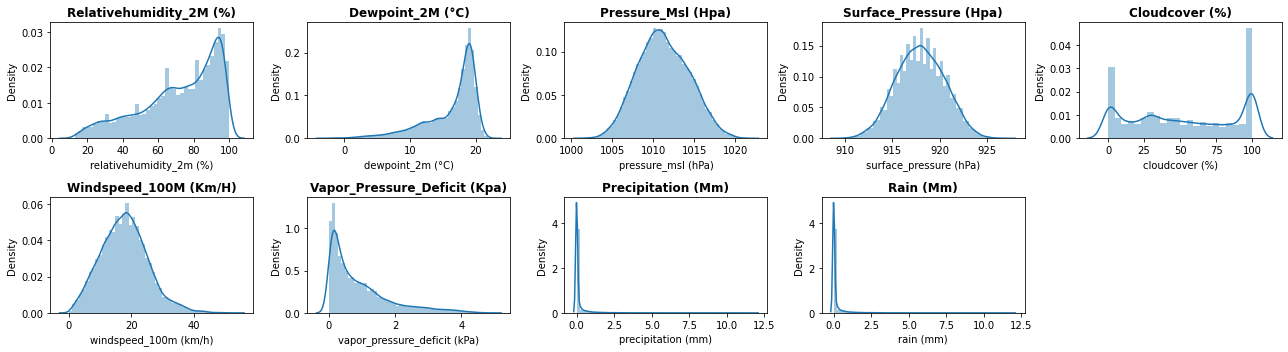

In [ ]:
# Visualizing the distribution
plt.figure(figsize=(18,5))
for n, column in enumerate(df.describe().columns):
  plt.subplot(3, 4, n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}', fontweight='bold')
  plt.tight_layout()

In [ ]:
type(df['time'][0])

str

In [ ]:
df['time']=pd.to_datetime(df['time'])

In [ ]:
df['month'] = df['time'].apply(lambda x : x.month)
df['Day_number'] = df['time'].dt.strftime("%U")

In [ ]:
df.set_index('time',inplace=True)

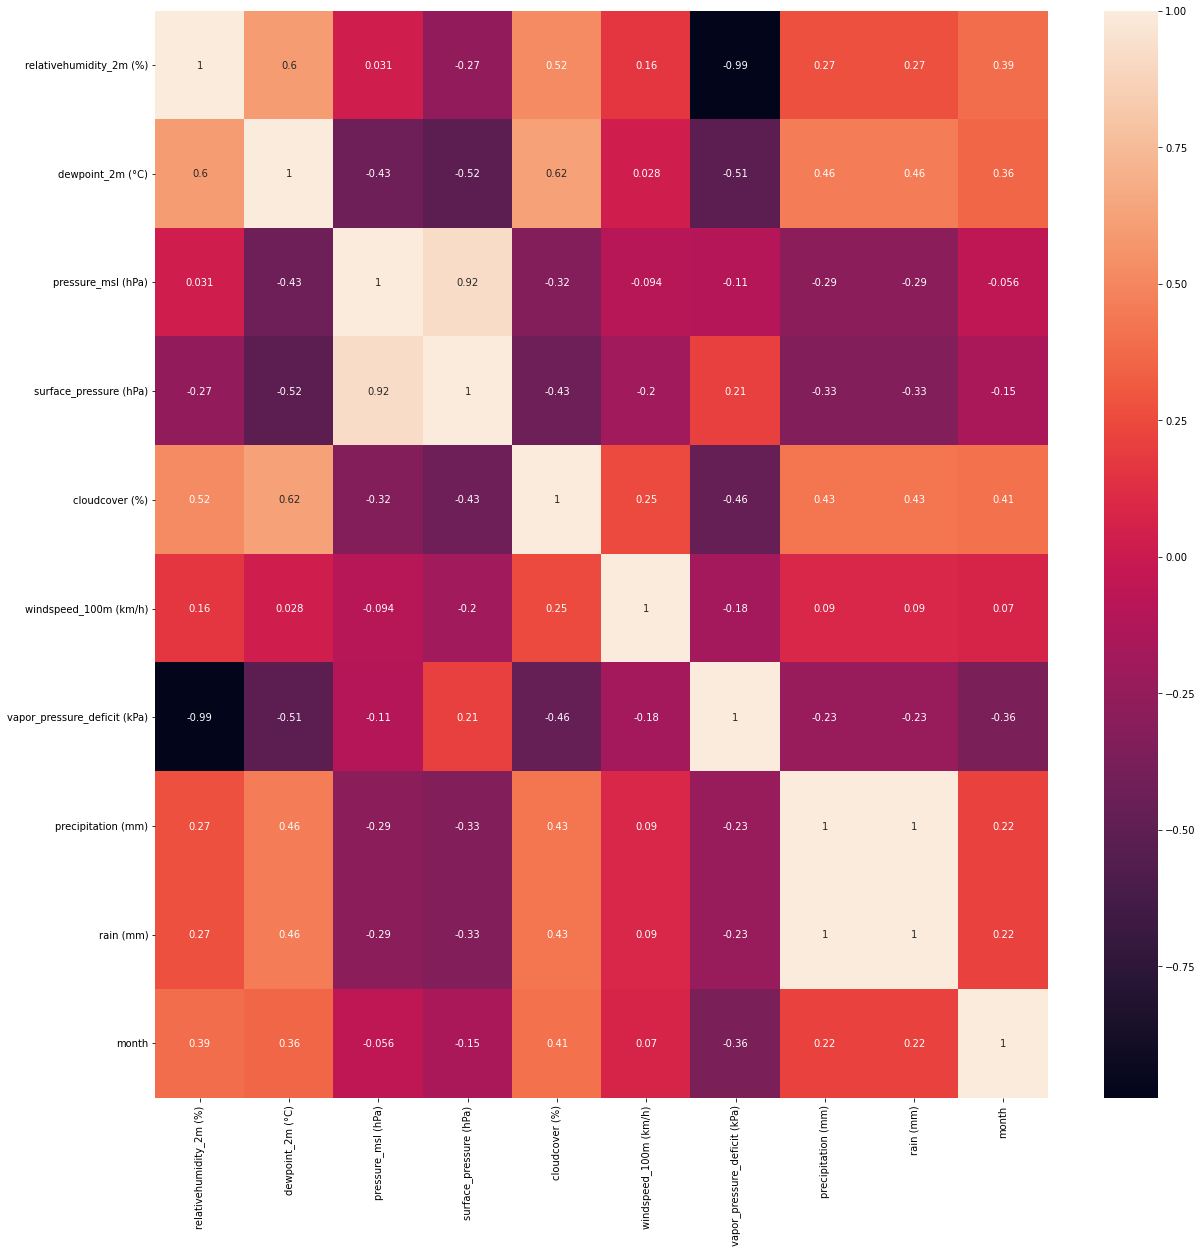

In [ ]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

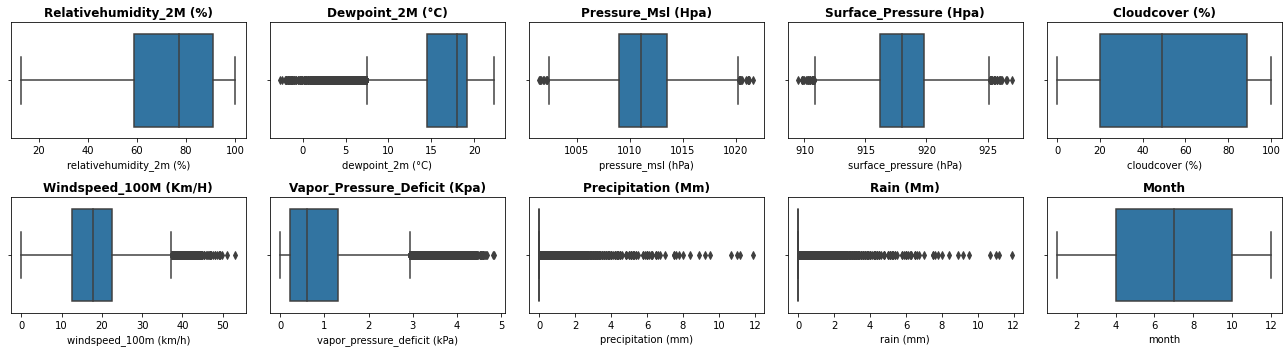

In [ ]:
# Visiualizing in boxplot is easyway to find outliers in our dataset
plt.figure(figsize=(18,5))
for n, column in enumerate(df.describe().columns):
  plt.subplot(3, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}', fontweight='bold')
  plt.tight_layout()

In [ ]:
df = df.fillna(df.median())

In [ ]:
df.isnull().sum()

relativehumidity_2m (%)         0
dewpoint_2m (°C)                0
pressure_msl (hPa)              0
surface_pressure (hPa)          0
cloudcover (%)                  0
windspeed_100m (km/h)           0
vapor_pressure_deficit (kPa)    0
precipitation (mm)              0
rain (mm)                       0
month                           0
Day_number                      0
dtype: int64

In [ ]:
df['Day_number'] = df['Day_number'].astype(int)

In [ ]:
import scipy.stats as stats

relativehumidity_2m (%)


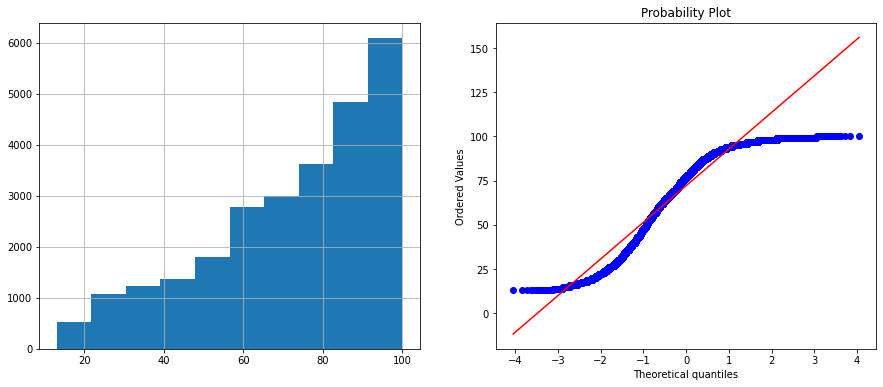

dewpoint_2m (°C)


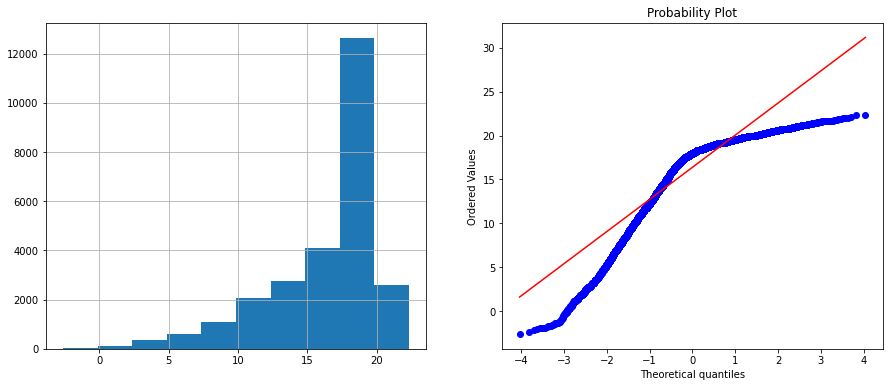

pressure_msl (hPa)


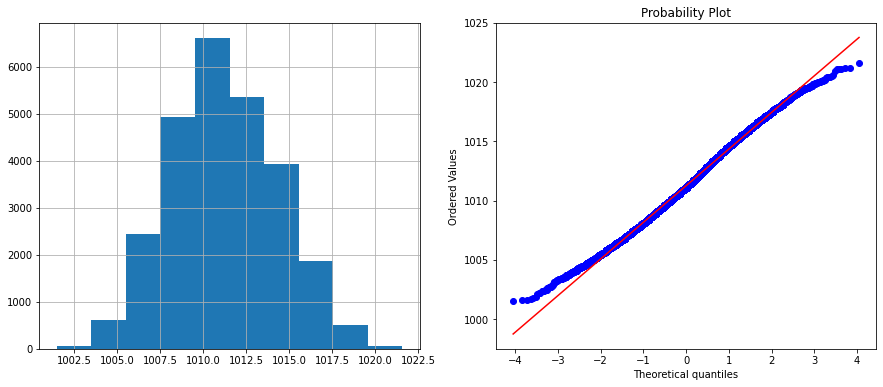

surface_pressure (hPa)


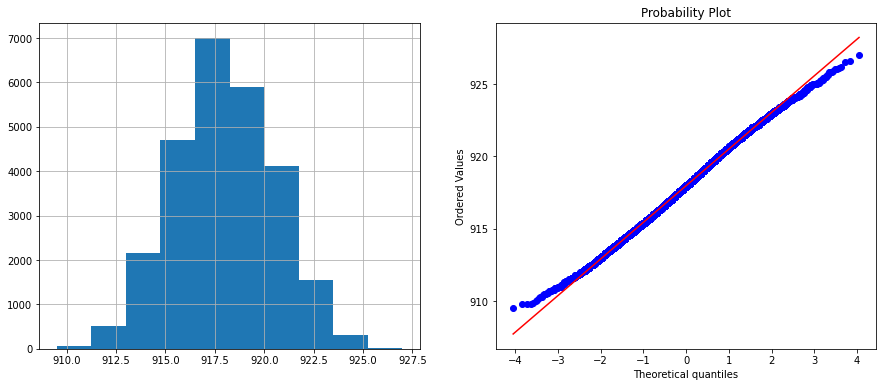

cloudcover (%)


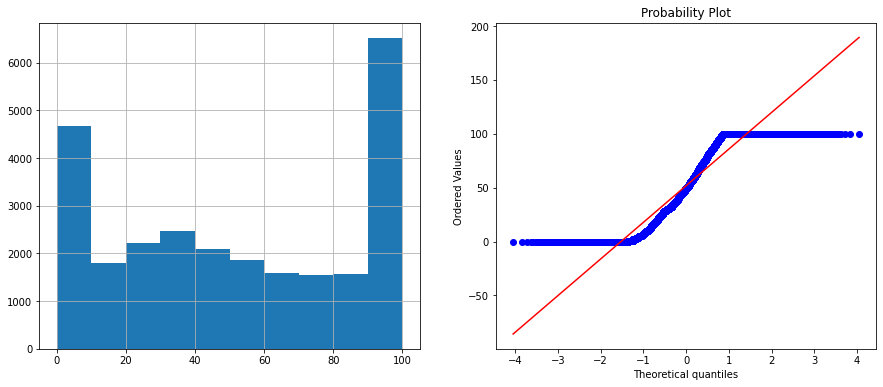

windspeed_100m (km/h)


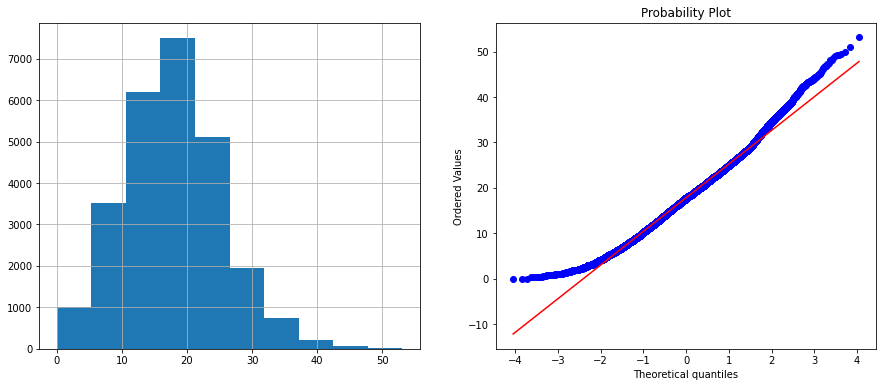

vapor_pressure_deficit (kPa)


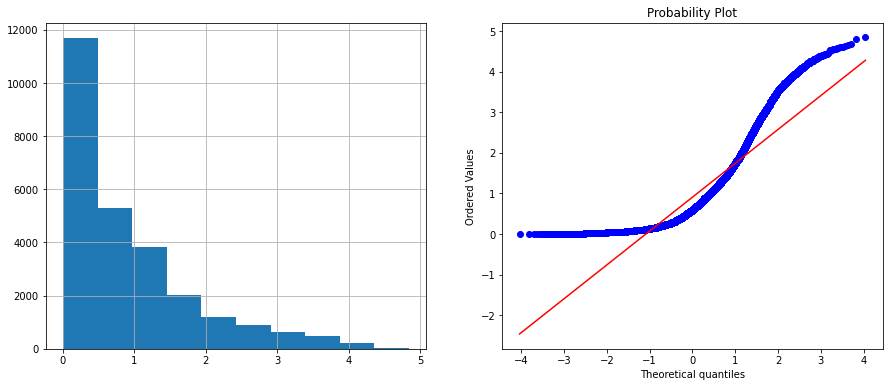

precipitation (mm)


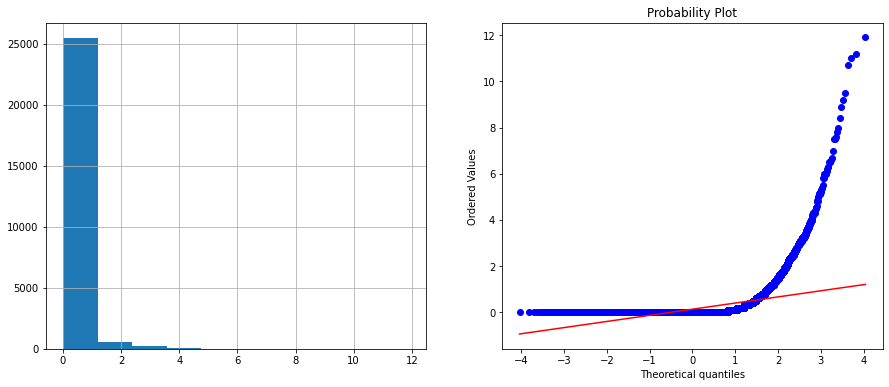

rain (mm)


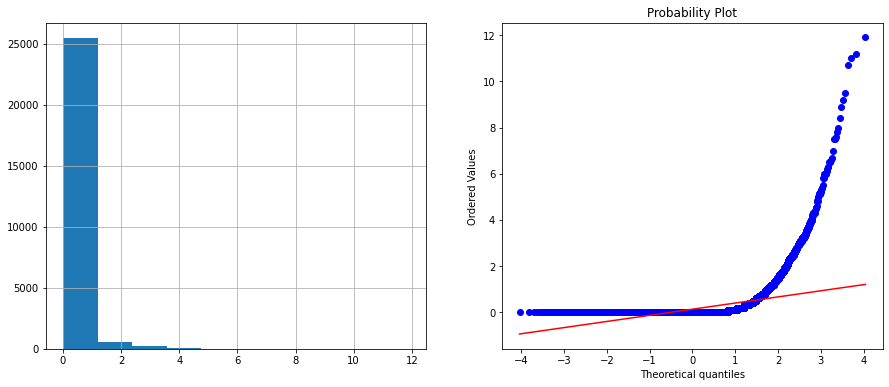

month


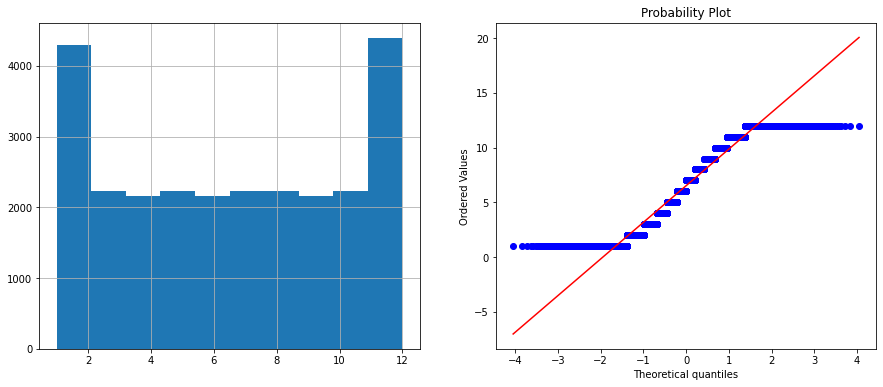

Day_number


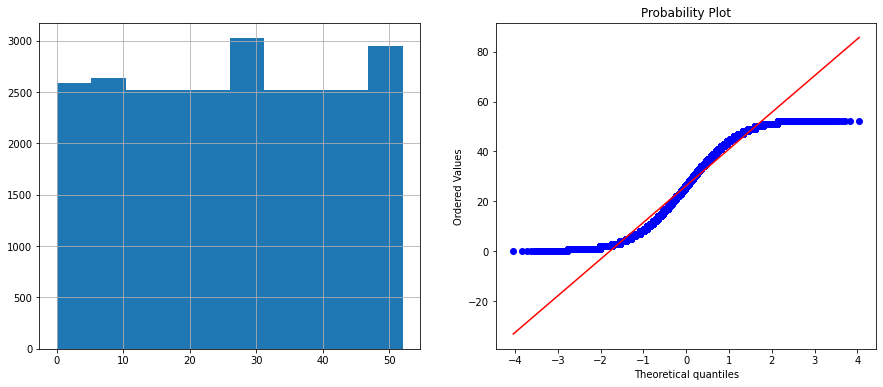

In [ ]:
for feature in df:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [ ]:
X = df.drop(["rain (mm)"], axis=1)
Y = df["rain (mm)"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
y_train.head()

time
2020-04-08 02:00:00    0.0
2022-04-24 12:00:00    0.0
2020-09-06 11:00:00    0.2
2021-05-31 11:00:00    0.0
2021-11-11 14:00:00    3.1
Name: rain (mm), dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
#check the coefficeint
reg.coef_
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 7.316162245762473e-30
RMSE : 2.704840521317749e-15
MAE : 2.1395426536705465e-15
R2 : 1.0
Adjusted R2 : 1.0
